# Building a CNN using Kears on Fashion MNIST Dataset

### Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow
import warnings
warnings.filterwarnings('ignore')

### Dataset Preparation

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(10000, 785)

Our dataset contains 10,000 rows and 785 columns out of which first column (i.e., label) is our target column. 

### Splitting data into dependent and independent features

In [4]:
X = data.iloc[:,1:].values
X = X/255.0
y = data.iloc[:,0].values
print(X.shape,y.shape)

(10000, 784) (10000,)


In [5]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

So, our dataset contains 10 different label categories and each category has 10,000 examples. Thus, or dataset is a well-balanced dataset.

Since, CNNs accept input in the form of images, we need to convert this data into image form.

In [6]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


### Visulizing the dataset

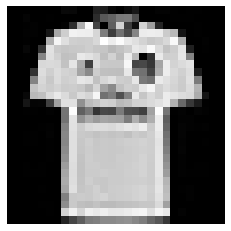

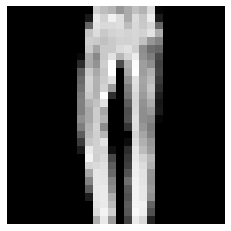

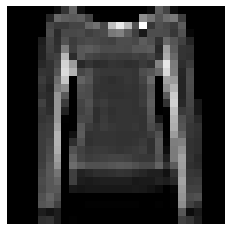

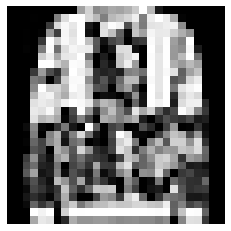

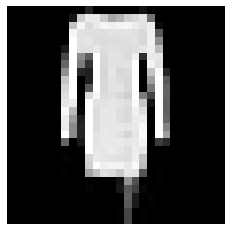

In [7]:
for i in range(5):
    plt.figure(figsize=(8,4))
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.show()


### Making a CNN Model

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [9]:
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
hist = model.fit(X_train,Y_train,epochs=15,shuffle=True,batch_size=256,validation_split=0.2)

Epoch 1/15
32/32 [==============================] - 24s 751ms/step - loss: 1.6424 - accuracy: 0.3970 - val_loss: 1.0212 - val_accuracy: 0.6515
Epoch 2/15
32/32 [==============================] - 25s 777ms/step - loss: 0.8008 - accuracy: 0.7154 - val_loss: 0.7325 - val_accuracy: 0.7445
Epoch 3/15
32/32 [==============================] - 25s 772ms/step - loss: 0.6616 - accuracy: 0.7542 - val_loss: 0.6275 - val_accuracy: 0.7790
Epoch 4/15
32/32 [==============================] - 25s 786ms/step - loss: 0.6053 - accuracy: 0.7726 - val_loss: 0.5914 - val_accuracy: 0.7830
Epoch 5/15
32/32 [==============================] - 25s 777ms/step - loss: 0.5586 - accuracy: 0.7936 - val_loss: 0.5577 - val_accuracy: 0.8035
Epoch 6/15
32/32 [==============================] - 25s 767ms/step - loss: 0.5119 - accuracy: 0.8121 - val_loss: 0.5412 - val_accuracy: 0.8025
Epoch 7/15
32/32 [==============================] - 24s 750ms/step - loss: 0.4876 - accuracy: 0.8196 - val_loss: 0.4904 - val_accuracy: 0.8405

### Visualising model performance

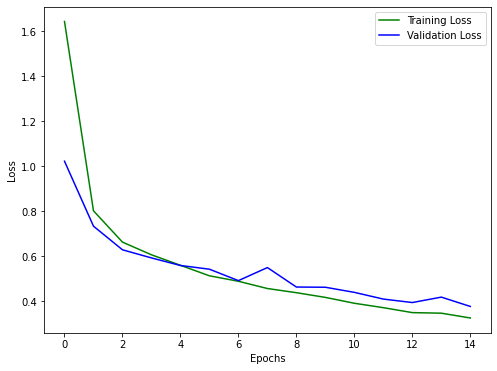

In [13]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'],'g', label = 'Training Loss')
plt.plot(hist.history['val_loss'],'b',label = 'Validation Loss')
plt.legend()
plt.show()

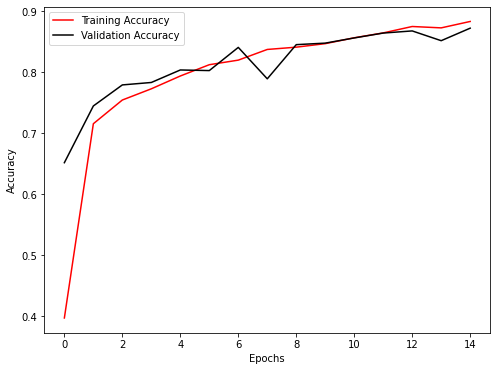

In [15]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],'r',label = 'Training Accuracy')
plt.plot(hist.history['val_accuracy'],'black',label = 'Validation Accuracy')
plt.legend()
plt.show()

In [17]:
print("Accuracy on Training data is: ", model.evaluate(X_train,Y_train)[1])

313/313 [==============================] - 7s 23ms/step - loss: 0.3353 - accuracy: 0.8882
Accuracy on Training data is:  0.8881999850273132
